In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from src.postproces_classificationresults import *
from src.plotting import *
from src.preproces import Handle_Files

import pickle

file_handler = Handle_Files()
model_name = 'LR'

In [2]:
dict_dir = f'D:/Programmering/msc/Masterthesis_S23-Results/dicts/{model_name}'

with open('/'.join([dict_dir, f'classification_summaries_{model_name}_f1.pkl']), 'rb') as file:
    classification_summaries = pickle.load(file)

with open('/'.join([dict_dir, f'target_summaries_{model_name}_f1.pkl']), 'rb') as file:
    target_summaries = pickle.load(file)

with open('/'.join([dict_dir, f'roc_information_{model_name}_f1.pkl']), 'rb') as file:
    roc_information = pickle.load(file)

for dictionary in [classification_summaries, target_summaries, roc_information]:
    dictionary['supervised_features'] = dictionary.pop('johannes_supervised_features')

# Performance development

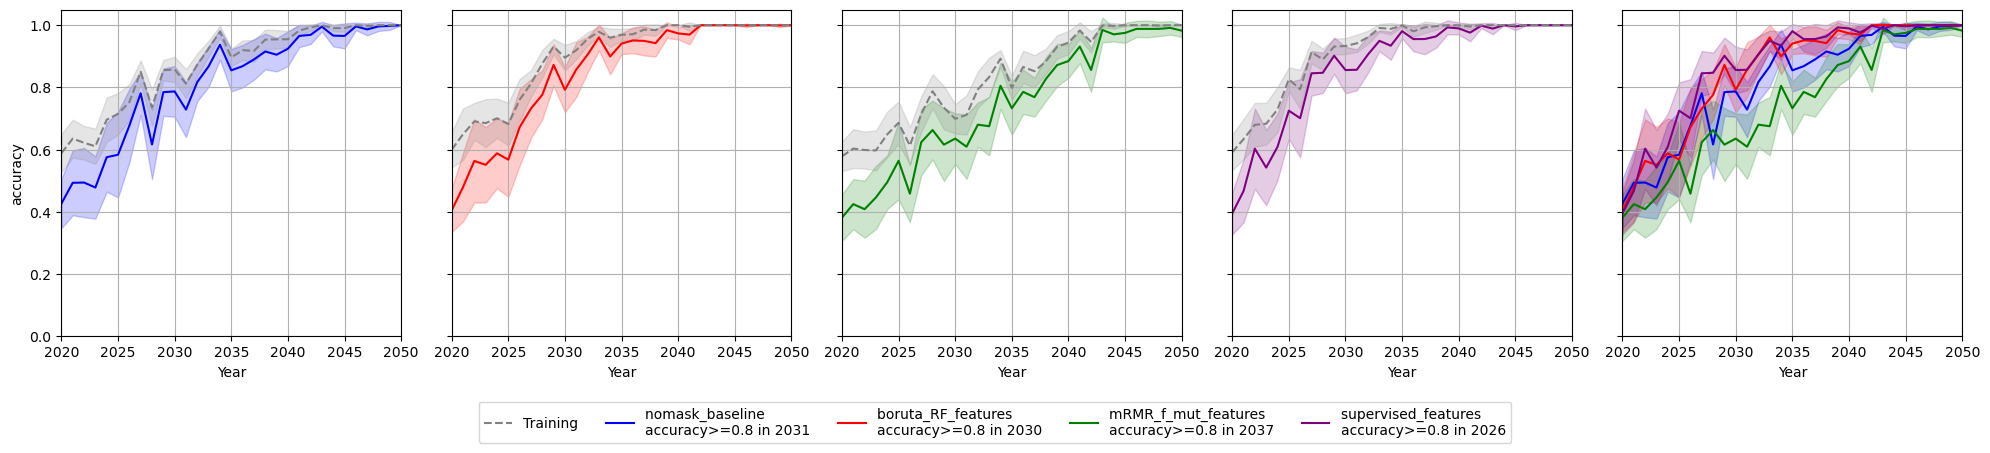

In [3]:
plot_performance(classification_summaries, metric='accuracy', years=list(range(2020, 2051)), 
                 model_name='Gaussian Naive Bayes classifier', spread=True, 
                 summary_subplot_for_spread=True, 
                 include_train=True, 
                 report_crossing=True, 
                 notitle=True,
                 turn_on_subplot_legend=False,)

# ROC and AUC analysis

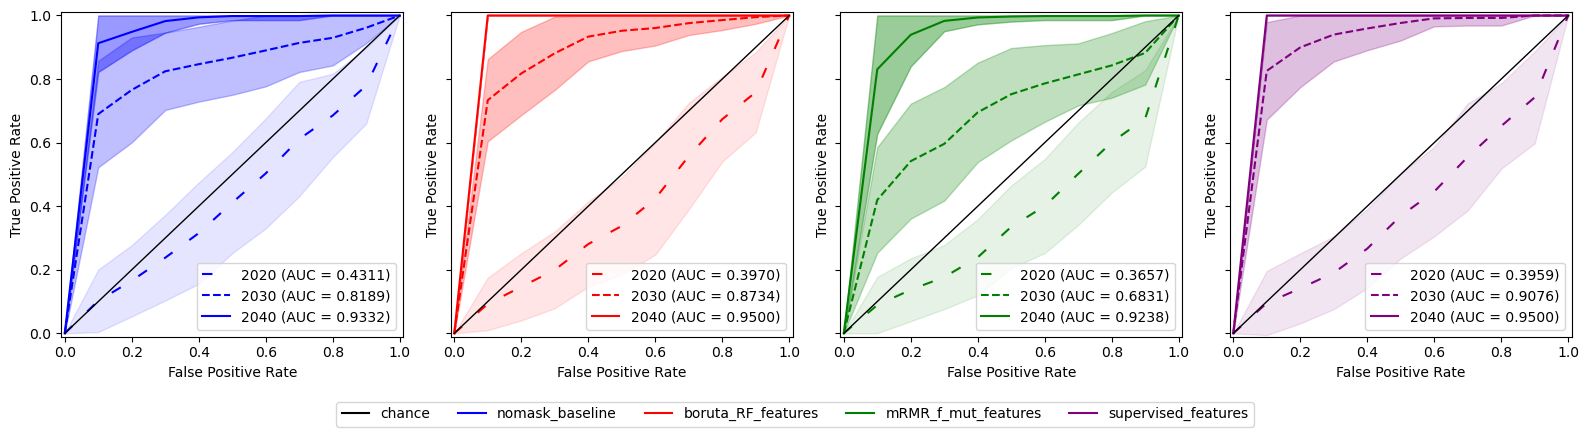

In [4]:
plot_roc_curve(roc_information, years=[2020, 2030, 2040], 
               model_name='Logistic Regression', title=None, 
               spread=True, summary_subplot_for_spread=False,
               notitle=True,
)

# Table representation

In [10]:
accuracy_df_long = create_plotdata_from_summary(classification_summaries, 'accuracy', years=list(range(2020, 2051)), include_train=True)
f1_df_long = create_plotdata_from_summary(classification_summaries, 'f1-score', years=list(range(2020, 2051)), include_train=True)

summary_df_acc = accuracy_df_long[accuracy_df_long['Year'].between(2035, 2040)].groupby(['feature_comb_key']).mean().reset_index()
summary_df_acc = summary_df_acc[['feature_comb_key', 'accuracy', 'training_accuracy']]
summary_df_acc.columns = ['feature_comb_key', 'accuracy test', 'accuracy training']

summary_df_f1 = f1_df_long[f1_df_long['Year'].between(2035, 2040)].groupby(['feature_comb_key']).mean().reset_index()
summary_df_f1 = summary_df_f1[['feature_comb_key', 'f1-score', 'training_f1-score']]
summary_df_f1.columns = ['feature_comb_key', 'f1-score test', 'f1-score training']

summary_df = summary_df_acc.merge(summary_df_f1, on='feature_comb_key')
for col in summary_df.columns:
    if col != 'feature_comb_key':
        summary_df[col] = summary_df[col].round(4)

print(summary_df)

# or 

accuracy_df_long = create_plotdata_from_summary(classification_summaries, 'accuracy', years=list(range(2020, 2051)), include_train=True)
print(accuracy_df_long.columns)

mean = accuracy_df_long[accuracy_df_long['Year'].between(2035, 2040)].groupby(['feature_comb_key']).mean().reset_index()
sd = accuracy_df_long[accuracy_df_long['Year'].between(2035, 2040)].groupby(['feature_comb_key']).std().reset_index()

for df in [mean, sd]:
    for col in df.columns:
        if col != 'feature_comb_key':
            df[col] = df[col].round(2)

summary_df_acc = mean.merge(sd, on='feature_comb_key', suffixes=('_mean', '_sd'))
summary_df_acc['estimated classification accuracy'] = '$' + summary_df_acc['accuracy_mean'].astype(str) + '\pm ' + summary_df_acc['accuracy_sd'].astype(str) +'$'

#summary_df_acc = summary_df_acc[['feature_comb_key', 'accuracy', 'training_accuracy']]

summary_df_acc = summary_df_acc[['feature_comb_key', 'estimated classification accuracy']]
summary_df_acc

               feature_comb_key  accuracy test  accuracy training  \
0            boruta_RF_features         0.9568             0.9850   
1  johannes_supervised_features         0.9729             0.9948   
2           mRMR_f_mut_features         0.8117             0.8789   
3               nomask_baseline         0.8929             0.9327   

   f1-score test  f1-score training  
0         0.9524             0.9864  
1         0.9702             0.9952  
2         0.8122             0.8862  
3         0.8860             0.9330  
Index(['Year', 'accuracy', 'feature_comb_key', 'training_accuracy'], dtype='object')


,feature_comb_key,estimated classification accuracy
0,boruta_RF_features,$0.96\pm 0.04$
1,johannes_supervised_features,$0.97\pm 0.04$
2,mRMR_f_mut_features,$0.81\pm 0.09$
3,nomask_baseline,$0.89\pm 0.07$


# Used hyperparameters

This performance was acchived using these models:

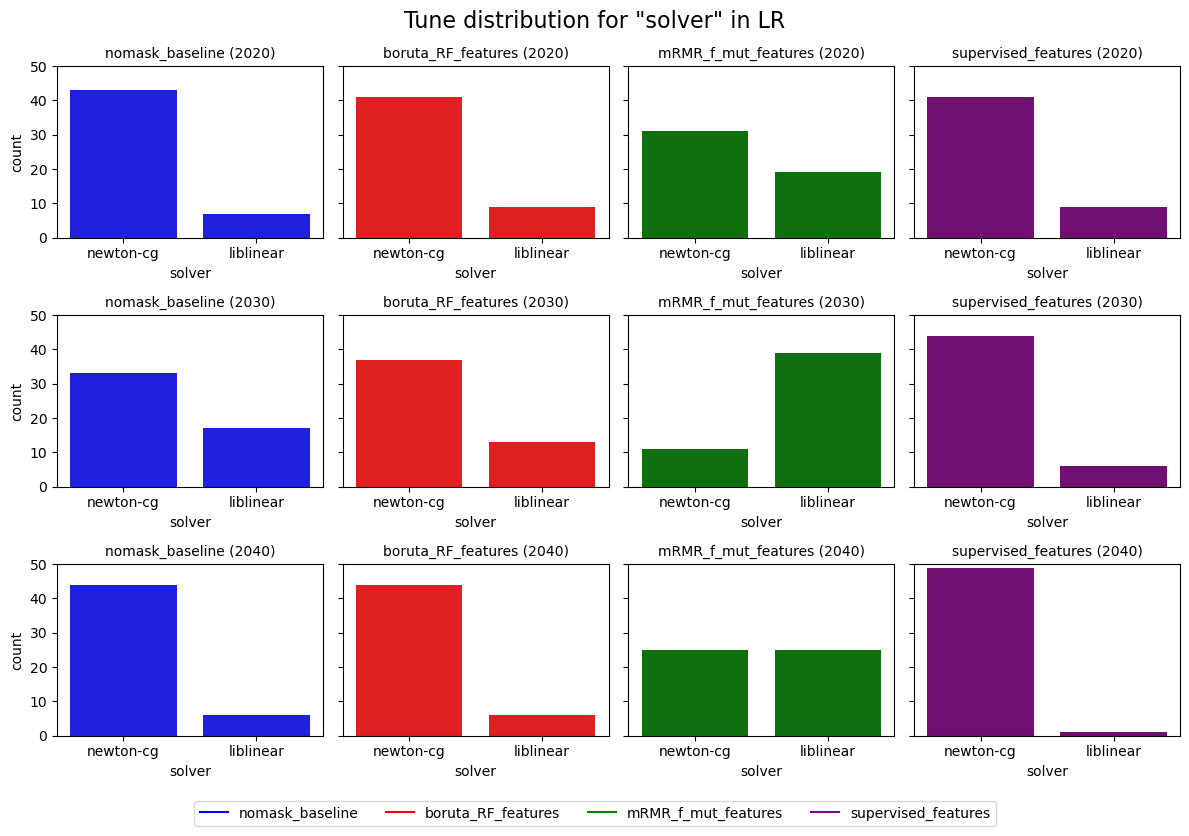

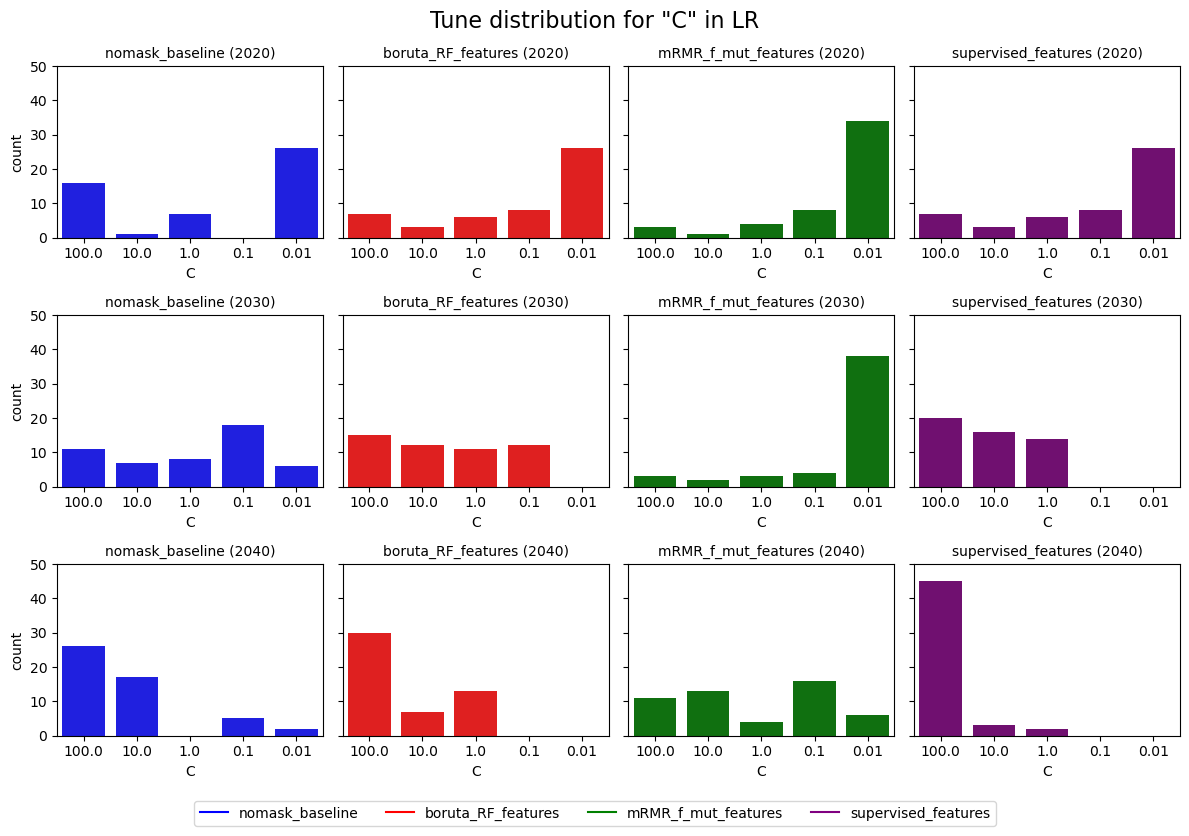

In [5]:
param_grid = {
        'solver': ['newton-cg', 'liblinear'],
        'penalty': ['l2'],
        'C': [100, 10, 1.0, 0.1, 0.01]
    }

plot_hyperparameters(target_summaries, model_name, years=[2020, 2030, 2040], param_grid=param_grid)

LISTeresting


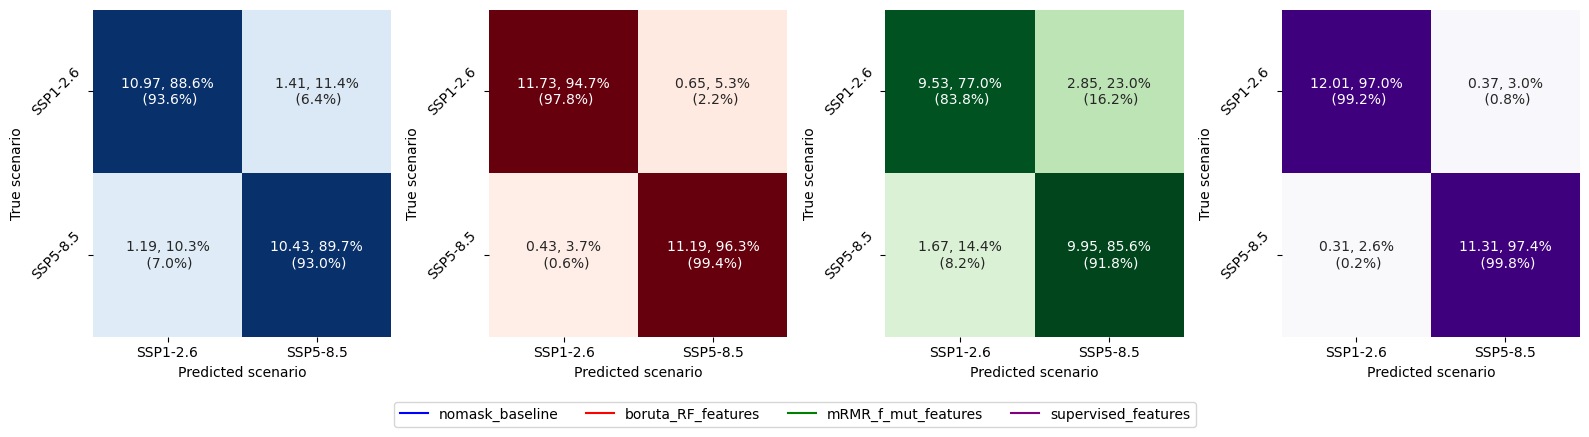

In [6]:
plot_cms(
    target_summaries, 
    model_name='Gaussian Naive Bayes classifier',
    report_performance=list(range(2035, 2041)),
    notitle=True,
    )